In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle

def read_pickle(path):
    with open(path, 'rb') as file:
        data  = pickle.load(file)
    
    return data


## Display DEM and Conditionning Points for simulation

The conditioning points consist of a set of GPR points and the elevation of the bedrock around the glacier. The "DEM_flag" flag is 0 for GPR points, and 1 for DEM-derived points. 
The flag "sex_rouge_flag" allows to distinguish the points belonging to the glacier of Scex Rouge.
The X and Y coordinates are in Swiss coordinates (CH1903 LV03 EPSG:21781).
The cell_x and cell_y are in simulation cell coordinates. 

In [8]:
HD = pd.read_csv('data/HardDataSet.csv')
HD

,X,Y,Bedrock_Al,sex_rouge_flag,DEM_flag,cell_x,cell_y
0,582751.0295,130232.9438,2743.706,0,0,352,1145
1,582762.1221,130227.2151,2743.253,0,0,357,1142
2,582772.2306,130220.0625,2740.084,0,0,362,1138
3,582783.4345,130215.6883,2737.141,0,0,368,1136
4,582535.5518,130459.8845,2776.081,1,0,244,1258
...,...,...,...,...,...,...,...
9606,583916.2921,129208.5012,2692.488,0,1,934,632
9607,583918.2921,129208.5012,2692.210,0,1,935,632
9608,583920.2921,129208.5012,2691.953,0,1,936,632
9609,583922.2921,129208.5012,2691.695,0,1,937,632


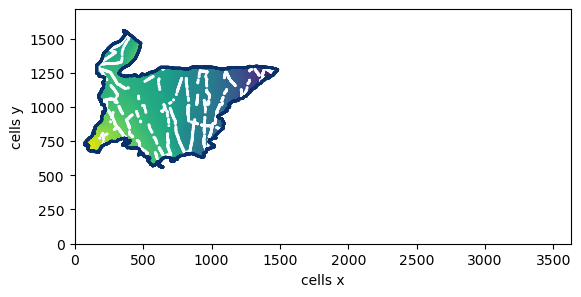

In [15]:
DEM = np.loadtxt('data/DEM_august_2019.txt')
plt.imshow(DEM, origin='lower')

plt.scatter(HD.cell_x,HD.cell_y,1,HD.DEM_flag, cmap='Blues')

plt.xlabel('cells x')
plt.ylabel('cells y')

plt.show()

## Reading the simulations

In [21]:
mps = [read_pickle('simulations/mps_bedrock.pickle'),read_pickle('simulations/mps_flow.pickle')]
sgs = [read_pickle('simulations/sgs_bedrock.pickle'),read_pickle('simulations/sgs_flow.pickle')]
kriging = [read_pickle('simulations/krig_bedrock.pickle'),read_pickle('simulations/krig_flow.pickle')]

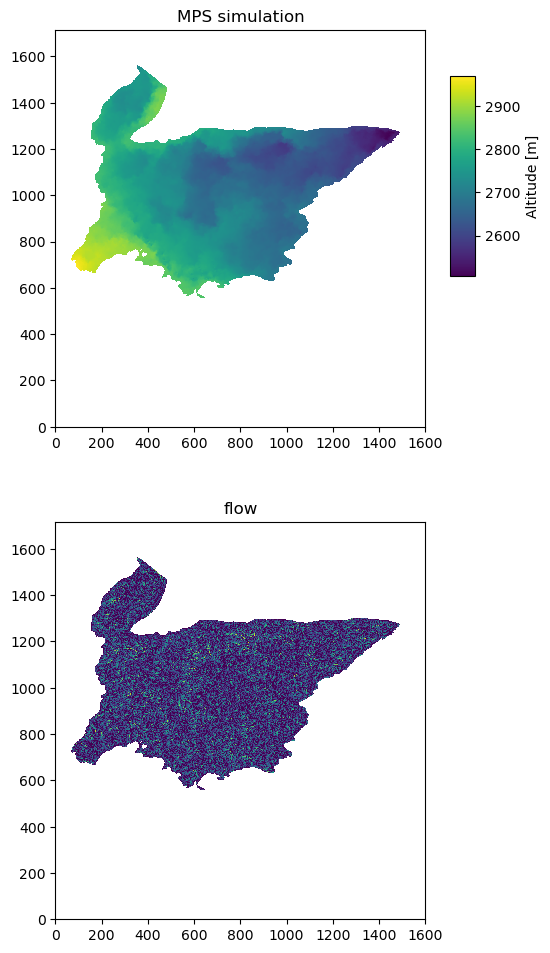

In [74]:
fig,ax = plt.subplots(2,1,figsize=(5,10))

img = ax[0].imshow(mps[0],origin='lower')
ax[0].set_xlim(0,1600)
ax[0].set_title('MPS simulation')
ax[1].imshow(mps[1],origin='lower', norm=LogNorm())
ax[1].set_xlim(0,1600)
ax[1].set_title('flow')
plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.70, 0.05, 0.2])
fig.colorbar(img, cax=cbar_ax,shrink=0.2)
cbar_ax.set_ylabel('Altitude [m]')
plt.show()

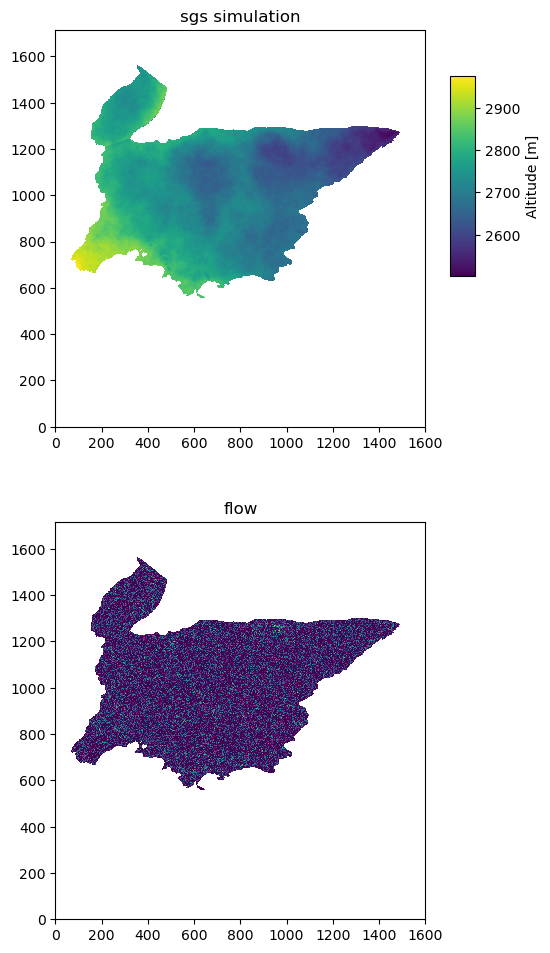

In [78]:
fig,ax = plt.subplots(2,1,figsize=(5,10))

img = ax[0].imshow(sgs[0],origin='lower')
ax[0].set_xlim(0,1600)
ax[0].set_title('sgs simulation')
ax[1].imshow(sgs[1],origin='lower', norm=LogNorm())
ax[1].set_xlim(0,1600)
ax[1].set_title('flow')
plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.70, 0.05, 0.2])
fig.colorbar(img, cax=cbar_ax,shrink=0.2)
cbar_ax.set_ylabel('Altitude [m]')
plt.show()

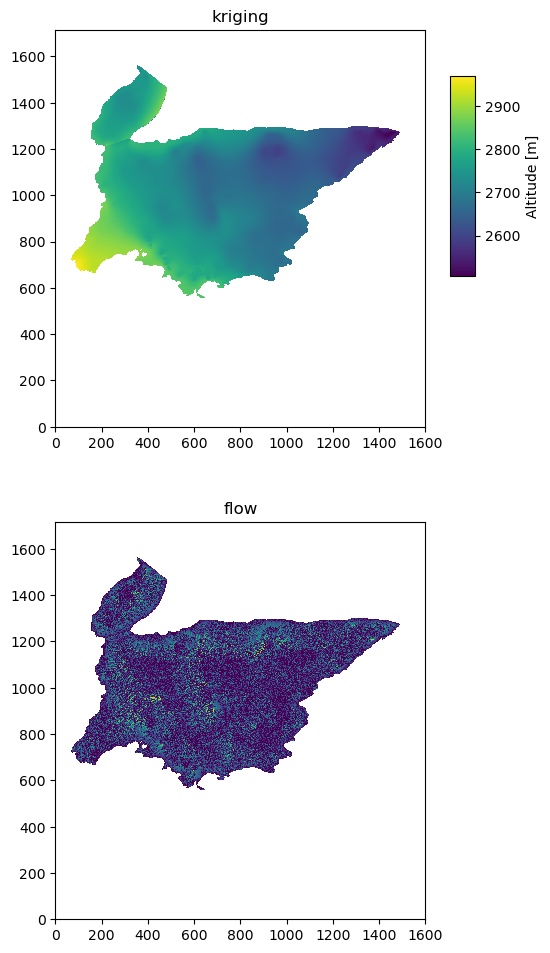

In [80]:
fig,ax = plt.subplots(2,1,figsize=(5,10))

img = ax[0].imshow(kriging[0],origin='lower')
ax[0].set_xlim(0,1600)
ax[0].set_title('kriging')
ax[1].imshow(kriging[1],origin='lower', norm=LogNorm())
ax[1].set_xlim(0,1600)
ax[1].set_title('flow')
plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.70, 0.05, 0.2])
fig.colorbar(img, cax=cbar_ax,shrink=0.2)
cbar_ax.set_ylabel('Altitude [m]')
plt.show()

## Mean simulation

In [104]:
mps_mean = [read_pickle('simulations/means/mps_mean_bedrock.pickle'),read_pickle('simulations/means/mps_std_bedrock.pickle')]
sgs_mean = [read_pickle('simulations/means/sgs_mean_bedrock.pickle'),read_pickle('simulations/means/sgs_std_bedrock.pickle')]


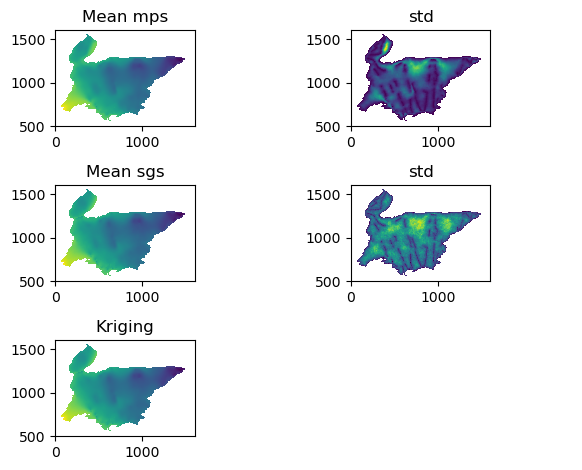

In [106]:
fig,ax = plt.subplots(3,2)

img = ax[0,0].imshow(mps_mean[0],origin='lower')
ax[0,0].set_xlim(0,1600)
ax[0,0].set_ylim(500,1600)

ax[0,0].set_title('Mean mps')

ax[0,1].imshow(mps_mean[1],origin='lower')
ax[0,1].set_xlim(0,1600)
ax[0,1].set_ylim(500,1600)

ax[0,1].set_title('std')

img = ax[1,0].imshow(sgs_mean[0],origin='lower')
ax[1,0].set_xlim(0,1600)
ax[1,0].set_ylim(500,1600)

ax[1,0].set_title('Mean sgs')

ax[1,1].imshow(sgs_mean[1],origin='lower')
ax[1,1].set_xlim(0,1600)
ax[1,1].set_ylim(500,1600)

ax[1,1].set_title('std')

img = ax[2,0].imshow(kriging[0],origin='lower')
ax[2,0].set_xlim(0,1600)
ax[2,0].set_ylim(500,1600)

ax[2,0].set_title('Kriging')

ax[2,1].set_axis_off()

plt.tight_layout()
plt.show()